**Week 4 – Advanced Models and Model Comparison**

In this week, advanced machine learning models are trained and compared
against the baseline Logistic Regression model to identify the best
performing model for exoplanet habitability prediction.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/exoplanet_clean_40k.csv')

# Missing value handling
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Final NaN safety
df = df.fillna(0)

# Re-identify numeric columns and scale
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Target variable (same as Week 3)
df['habitable'] = (df['pl_orbsmax'] < df['pl_orbsmax'].median()).astype(int)


/tmp/ipython-input-3806139054.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['habitable'] = (df['pl_orbsmax'] < df['pl_orbsmax'].median()).astype(int)


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('habitable', axis=1)
y = df['habitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(), y_test.value_counts()


(habitable
 0    2072
 1    1128
 Name: count, dtype: int64,
 habitable
 0    519
 1    282
 Name: count, dtype: int64)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9800249687890137
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       519
           1       0.97      0.98      0.97       282

    accuracy                           0.98       801
   macro avg       0.98      0.98      0.98       801
weighted avg       0.98      0.98      0.98       801



## Random Forest Model Evaluation

Random Forest was trained as an advanced machine learning model to
capture non-linear relationships between planetary and stellar features.
The model performance was evaluated using accuracy and classification
metrics.


In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.9313358302122348


In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr_preds)
rf_acc = accuracy_score(y_test, rf_preds)

print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Accuracy:", rf_acc)


Logistic Regression Accuracy: 0.9313358302122348
Random Forest Accuracy: 0.9800249687890137


In [8]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [lr_acc, rf_acc]
})

comparison_df


,Model,Accuracy
0,Logistic Regression,0.931336
1,Random Forest,0.980025


## Model Comparison

The Random Forest model outperformed the baseline Logistic Regression
model in terms of accuracy. This indicates that Random Forest is more
effective at capturing complex, non-linear relationships present in the
exoplanet dataset.


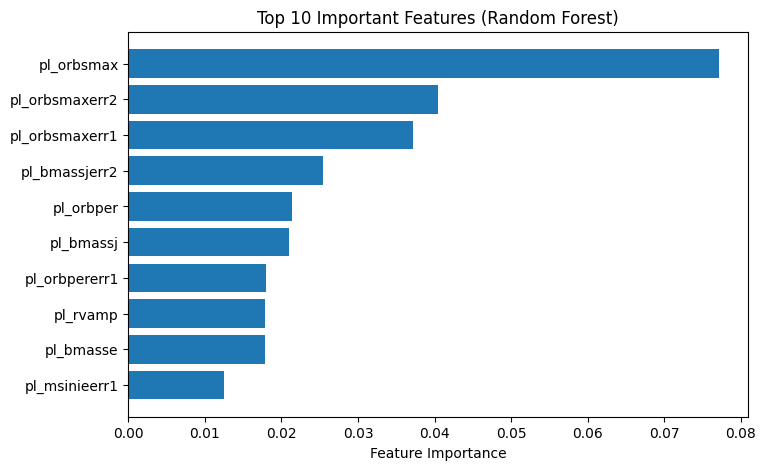

In [9]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


## Feature Importance Analysis

The feature importance analysis highlights the most influential features
used by the Random Forest model to predict exoplanet habitability.
Orbital and stellar characteristics play a significant role in model
decision-making.
